In [97]:
using CSV
using DataFrames
using Plots
using Query
pyplot()

Plots.PyPlotBackend()

# Rule


```Julia
if E(marker) = 1
    s(marker) = 999
else
    s(marker) = 2^L / log(rho) * log(10)
end
```

Formula:

$$ s = \frac{2^L}{\lg(\rho)} $$

# Parameters

In [105]:
# names

laser_names = [:red, :yellow, :blue, :violet]

dyes =[
    :Alexa_Fluor_647, 
    :Alexa_Fluor_700, 
    :APC, 
    :FITC, 
    :Pacific_Blue, 
    :PE, 
    :PE_Cy7, 
    :PerCP_Cy5_5]

markers = []

0-element Array{Any,1}

In [50]:
# relationships

lasers = Dict(
    :red => 640,
    :yellow => 561,
    :blue => 488,
    :violet => 405
)

lens = Dict(
    :red    => [(660, 20), (730, 45), (780, 60)],
    :yellow => [(586, 15), (610, 20), (670, 30), (710, 50), (780, 60)],
    :blue   => [(530, 30), (575, 26), (610, 20), (670, 30), (710, 50), (780, 60)],
    :violet => [(450, 50), (510, 50), (605, 40), (660, 40)]
)



antibody = Dict(
    
)

Dict{Any,Any} with 0 entries

8-element Array{Symbol,1}:
 :Alexa_Fluor_647
 :Alexa_Fluor_700
 :APC            
 :FITC           
 :Pacific_Blue   
 :PE             
 :PE_Cy7         
 :PerCP_Cy5_5    

In [53]:
excitation = CSV.read("常见染料_激发曲线.csv",
    types=[Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64],
    nullable=false)
emission = CSV.read("常见染料_吸收曲线.csv",
    types=[Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64],
    nullable=false)

,Wavelength,Alexa_Fluor_647,Alexa_Fluor_700,APC,FITC,Pacific_Blue,PE,PE_Cy7,PerCP_Cy5_5
1,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,301.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,302.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,303.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,304.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,305.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,306.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,307.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,308.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,309.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



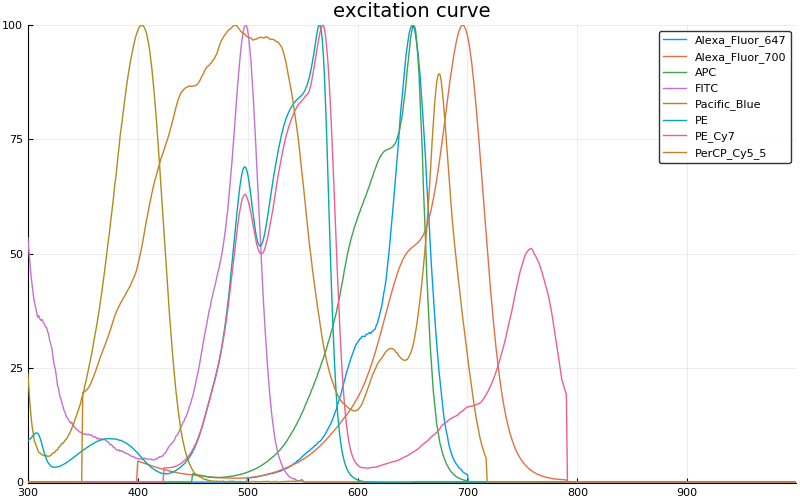

In [100]:
plot()
for i in dyes
    plot!(excitation[1], excitation[i], label=string(i))
end
plot!(size=(800,500),title="excitation curve")


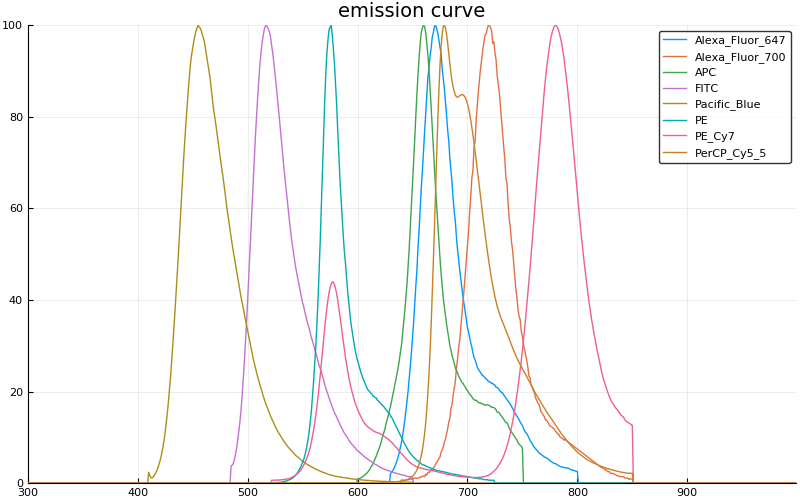

In [101]:
plot()
for i in dyes
    plot!(emission[1], emission[i], label=string(i))
end
plot!(size=(800,500),title="emission curve")


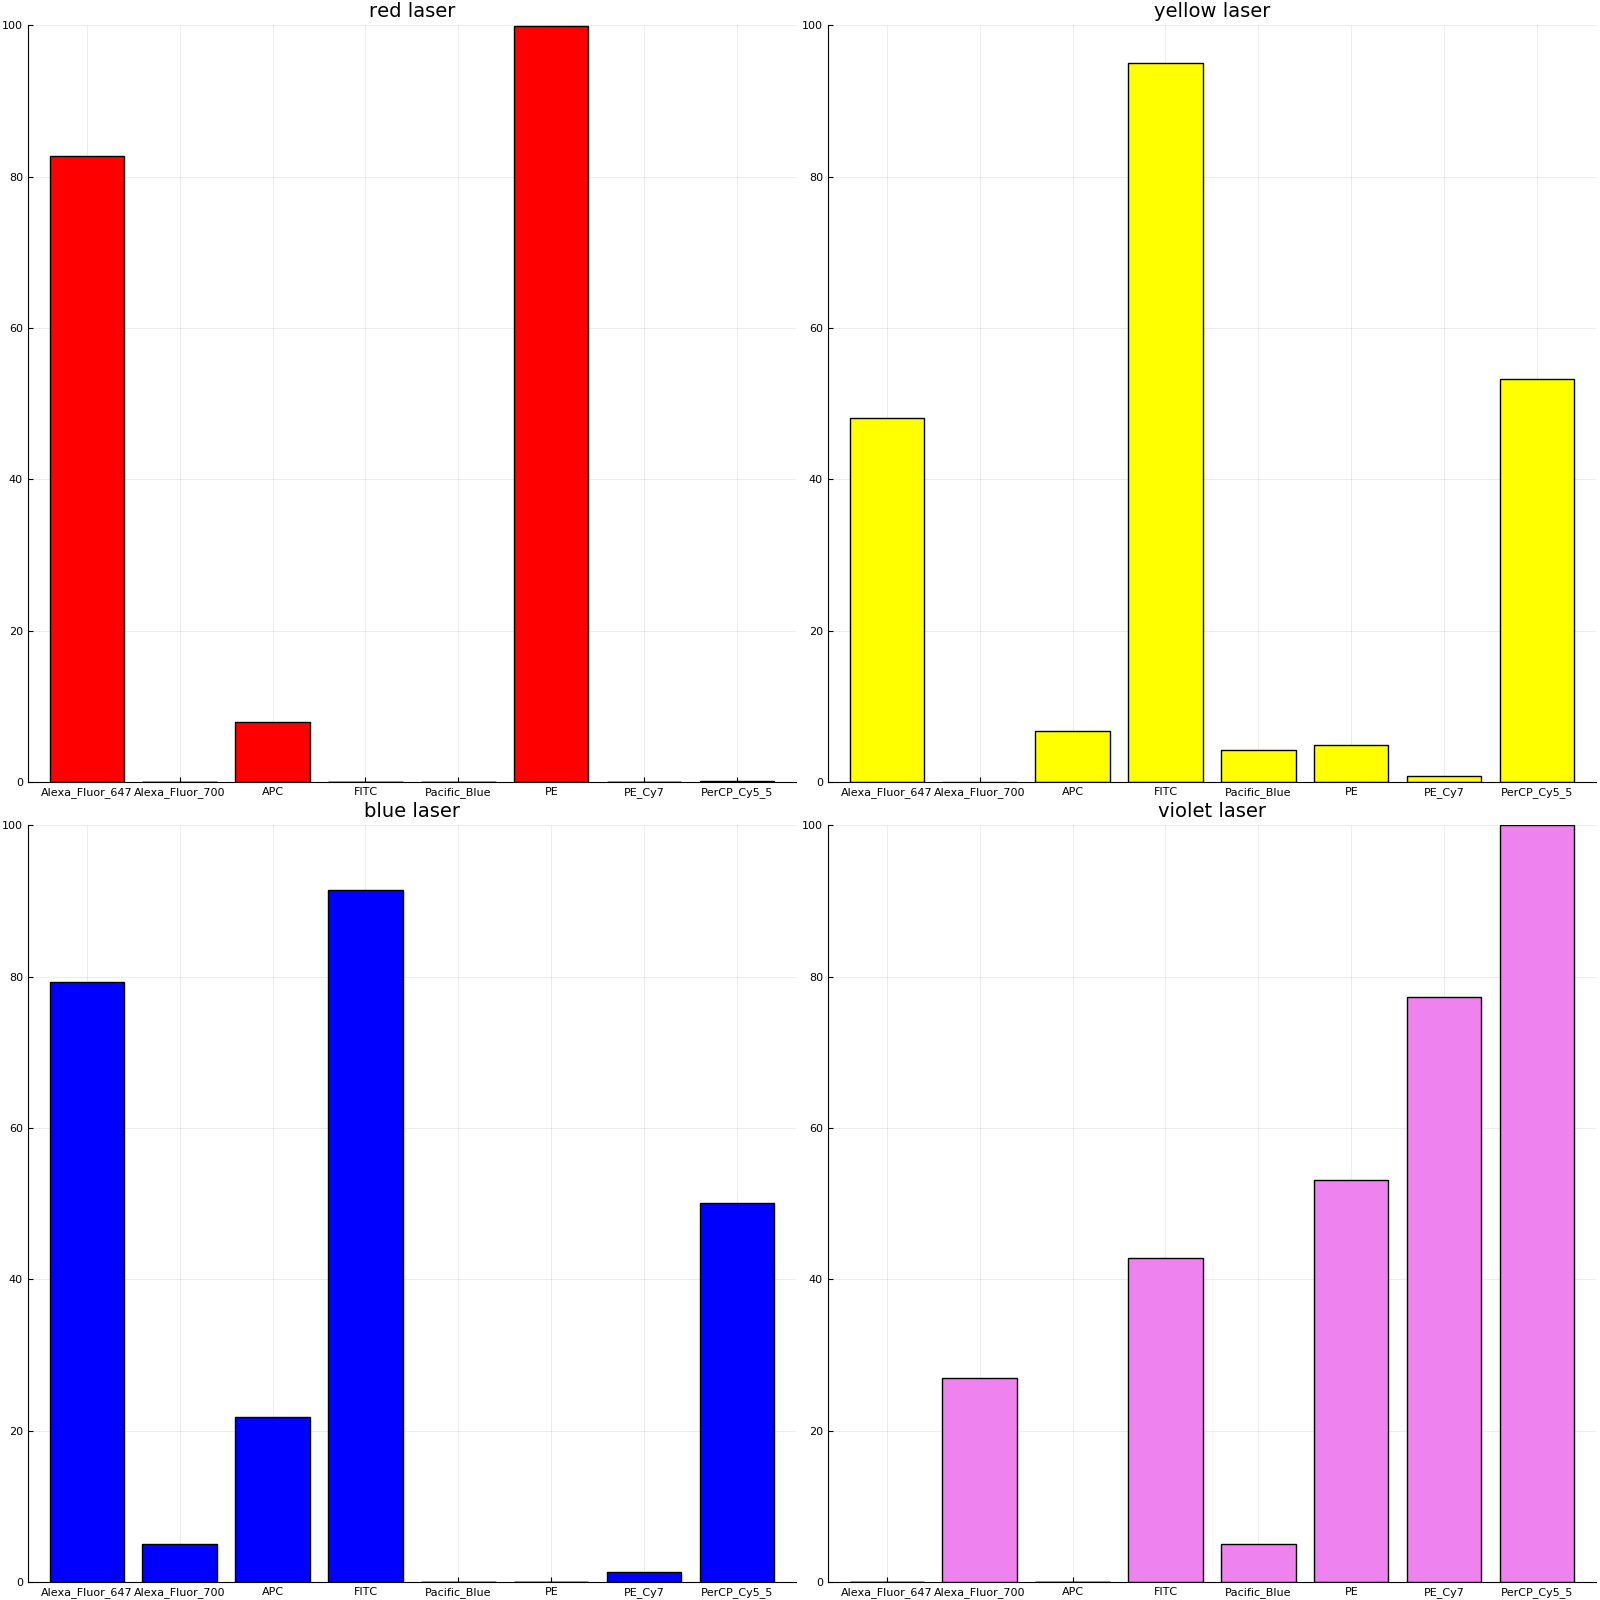

In [104]:
result = []
for (name, pos) in lasers
    map(x->append!(result, x), excitation[pos-299,:].columns[2:end])
end
result = reshape(result, (4, 8))

a = bar(map(string,dyes),result[1,:], size=(800,500), title="red laser", color=:red)
b = bar(map(string,dyes),result[2,:], size=(800,500), title="yellow laser", color=:yellow)
c = bar(map(string,dyes),result[3,:], size=(800,500), title="blue laser", color=:blue)
d = bar(map(string,dyes),result[4,:], size=(800,500), title="violet laser", color=:violet)
plot(a,b,c,d, layout=(2,2), size=(1600,1600), ylim=(0,100), legend=false)


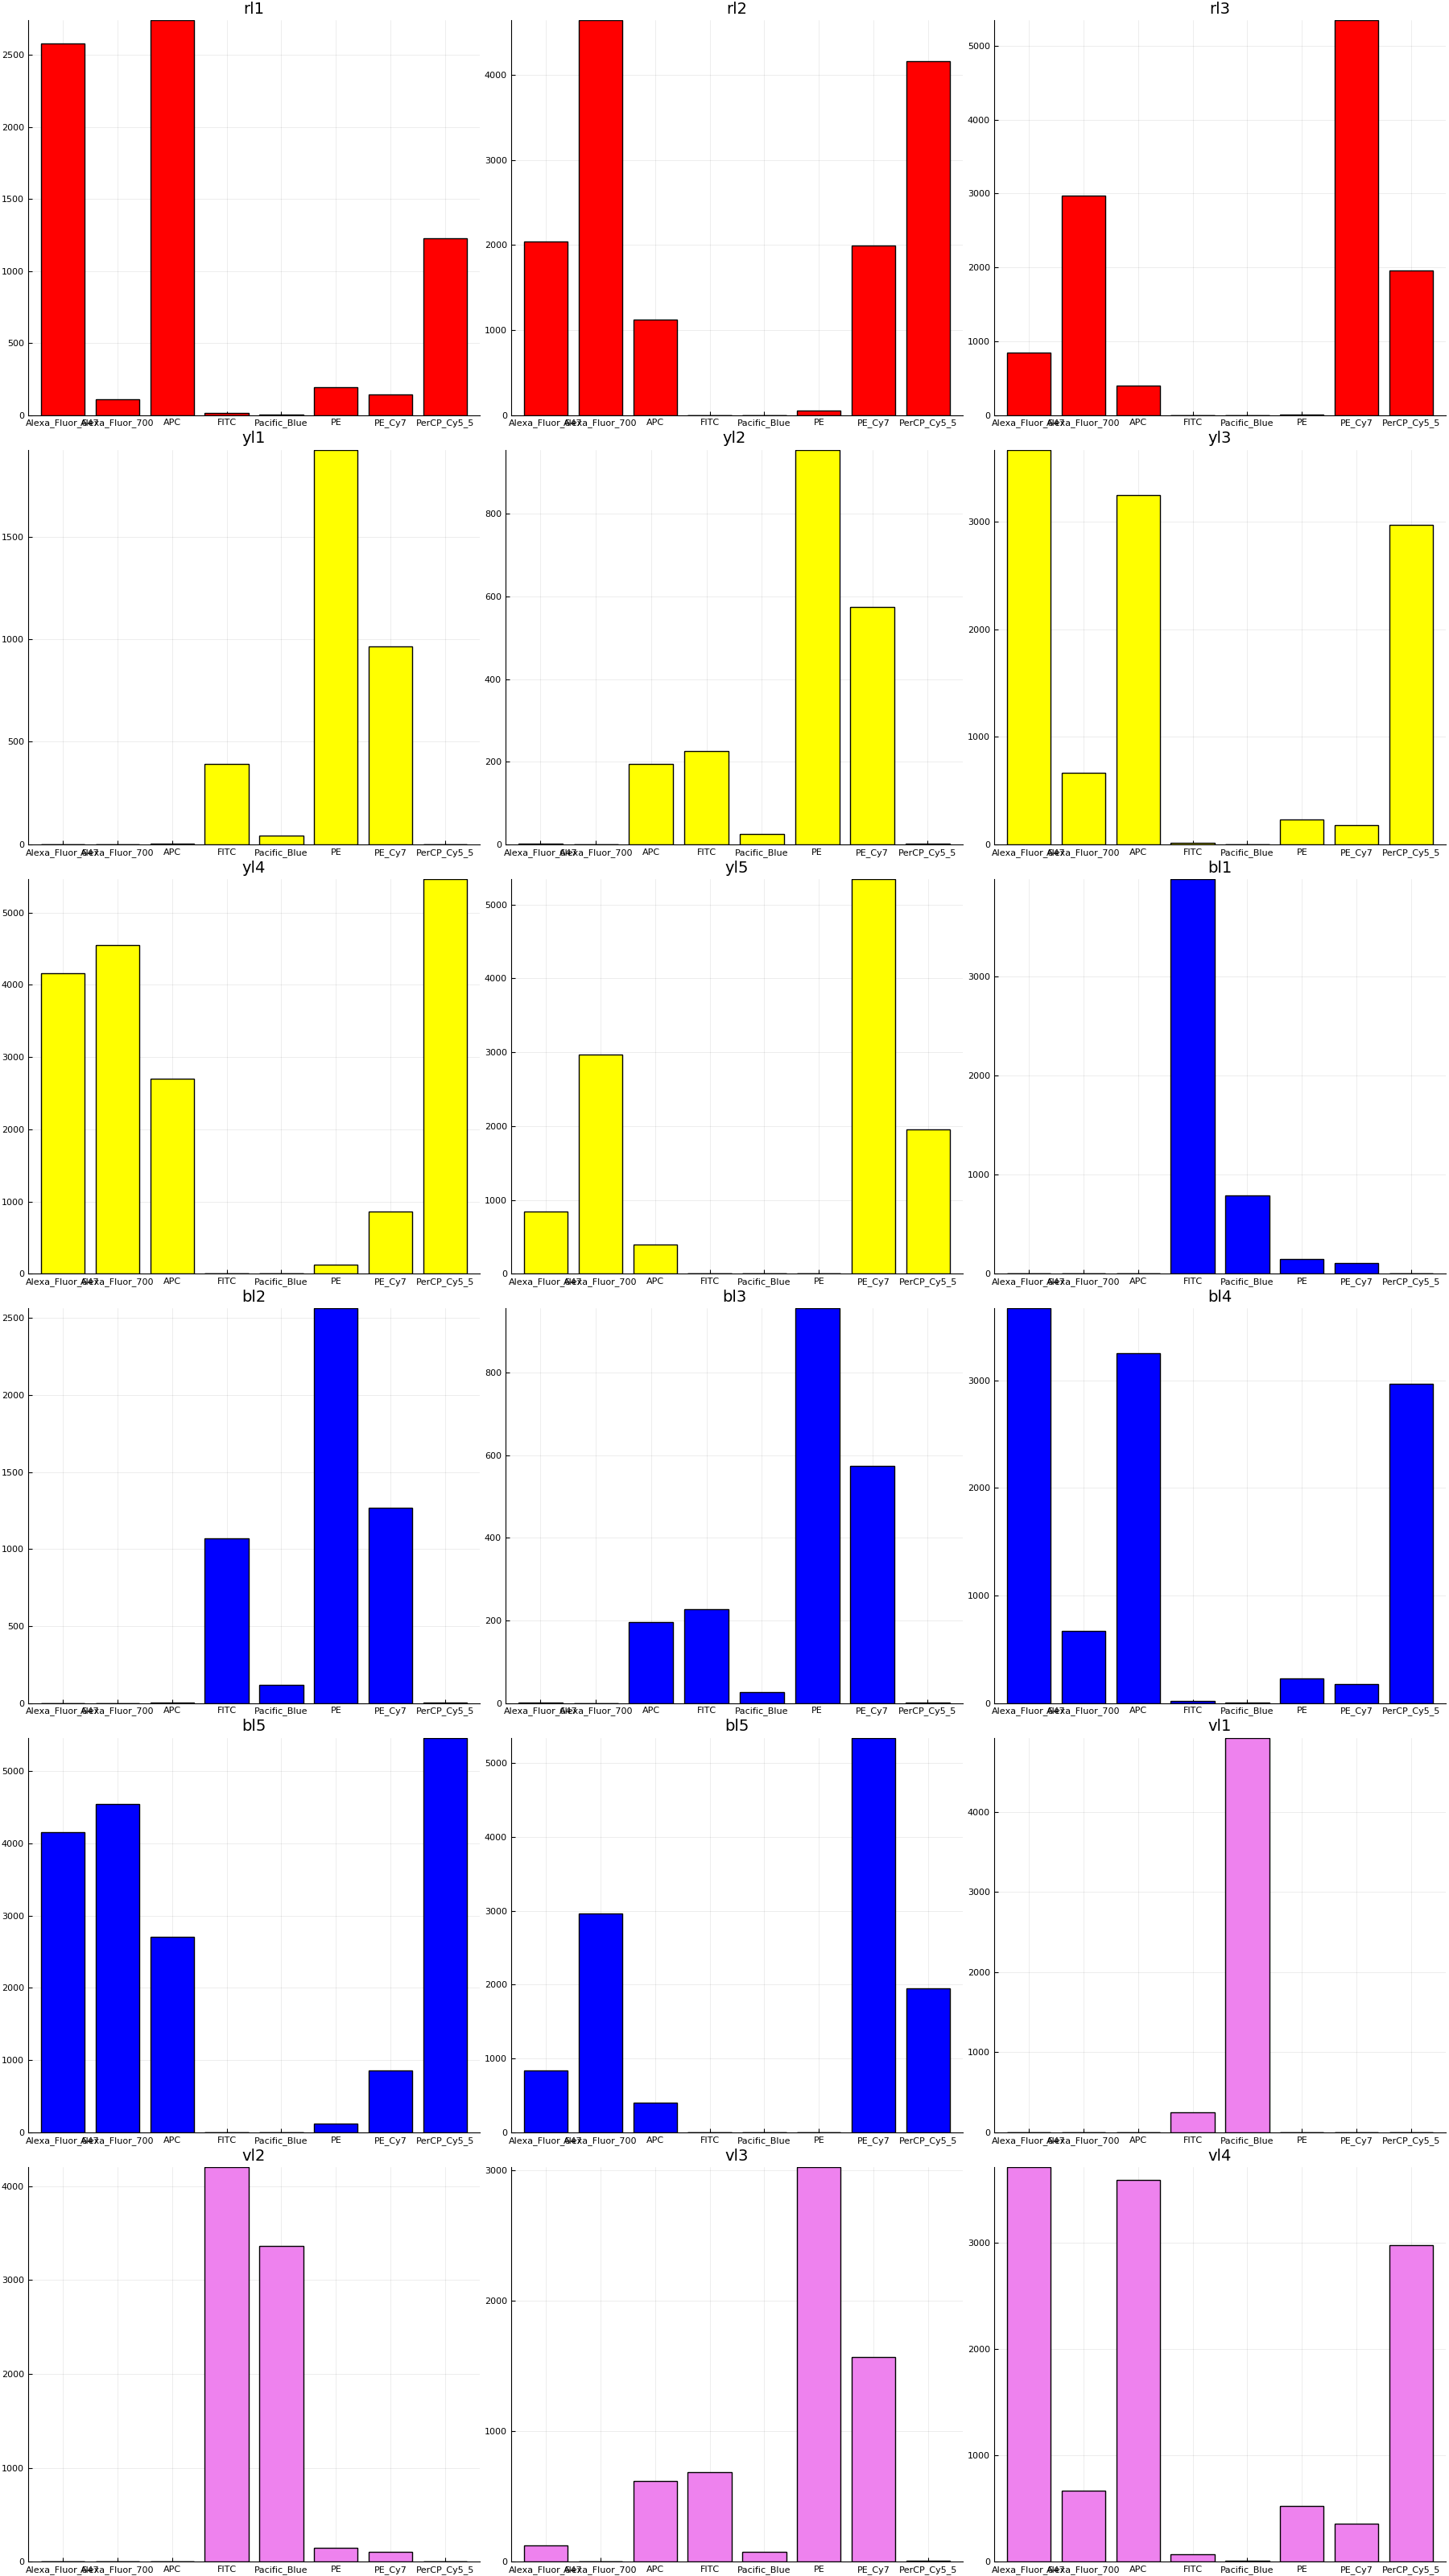

In [144]:
result = Dict()
for (name, windows) in lens
    result[name] = []
    for (point, ranger) in windows
        push!(result[name] ,map(sum, emission[point-ranger-299:point+ranger-299,2:end].columns))
    end
end

rl1 = bar(map(string,dyes),result[:red][1,:], size=(800,500), title="rl1", color=:red)
rl2 = bar(map(string,dyes),result[:red][2,:], size=(800,500), title="rl2", color=:red)
rl3 = bar(map(string,dyes),result[:red][3,:], size=(800,500), title="rl3", color=:red)

yl1 = bar(map(string,dyes),result[:yellow][1,:], size=(800,500), title="yl1", color=:yellow)
yl2 = bar(map(string,dyes),result[:yellow][2,:], size=(800,500), title="yl2", color=:yellow)
yl3 = bar(map(string,dyes),result[:yellow][3,:], size=(800,500), title="yl3", color=:yellow)
yl4 = bar(map(string,dyes),result[:yellow][4,:], size=(800,500), title="yl4", color=:yellow)
yl5 = bar(map(string,dyes),result[:yellow][5,:], size=(800,500), title="yl5", color=:yellow)

bl1 = bar(map(string,dyes),result[:blue][1,:], size=(800,500), title="bl1", color=:blue)
bl2 = bar(map(string,dyes),result[:blue][2,:], size=(800,500), title="bl2", color=:blue)
bl3 = bar(map(string,dyes),result[:blue][3,:], size=(800,500), title="bl3", color=:blue)
bl4 = bar(map(string,dyes),result[:blue][4,:], size=(800,500), title="bl4", color=:blue)
bl5 = bar(map(string,dyes),result[:blue][5,:], size=(800,500), title="bl5", color=:blue)
bl6 = bar(map(string,dyes),result[:blue][6,:], size=(800,500), title="bl5", color=:blue)

vl1 = bar(map(string,dyes),result[:violet][1,:], size=(800,500), title="vl1", color=:violet)
vl2 = bar(map(string,dyes),result[:violet][2,:], size=(800,500), title="vl2", color=:violet)
vl3 = bar(map(string,dyes),result[:violet][3,:], size=(800,500), title="vl3", color=:violet)
vl4 = bar(map(string,dyes),result[:violet][4,:], size=(800,500), title="vl4", color=:violet)

plot(rl1, rl2, rl3,
    yl1, yl2, yl3, yl4, yl5,
    bl1, bl2, bl3, bl4, bl5, bl6,
    vl1, vl2, vl3, vl4,
    layout=(6,3), size=(1800,3200), legend=false)